In [2]:
import pandas as pd
import csv
import json
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve


In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Age']

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

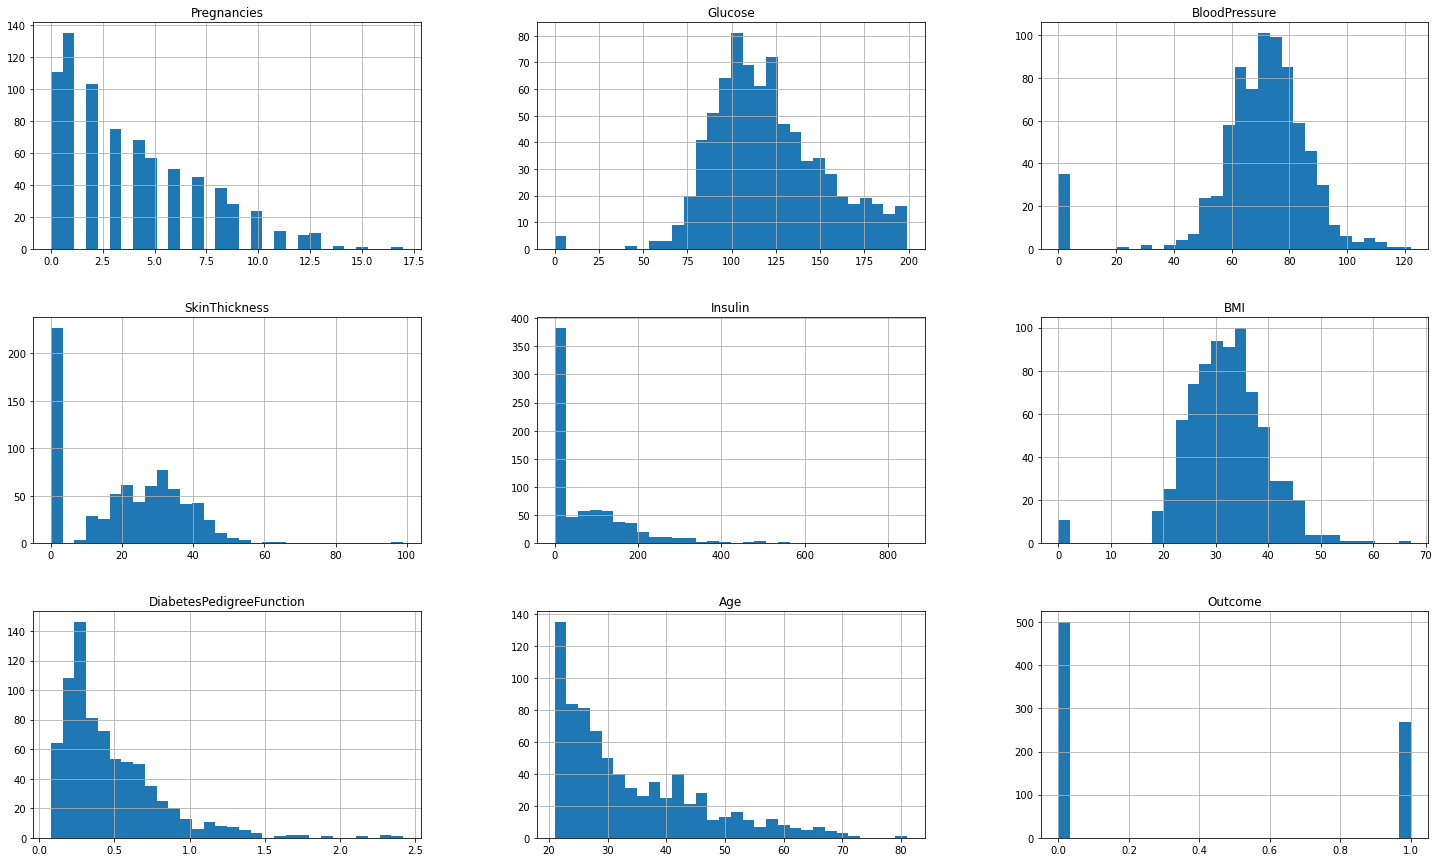

In [11]:
df.hist(bins=30, figsize=(25, 15))

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

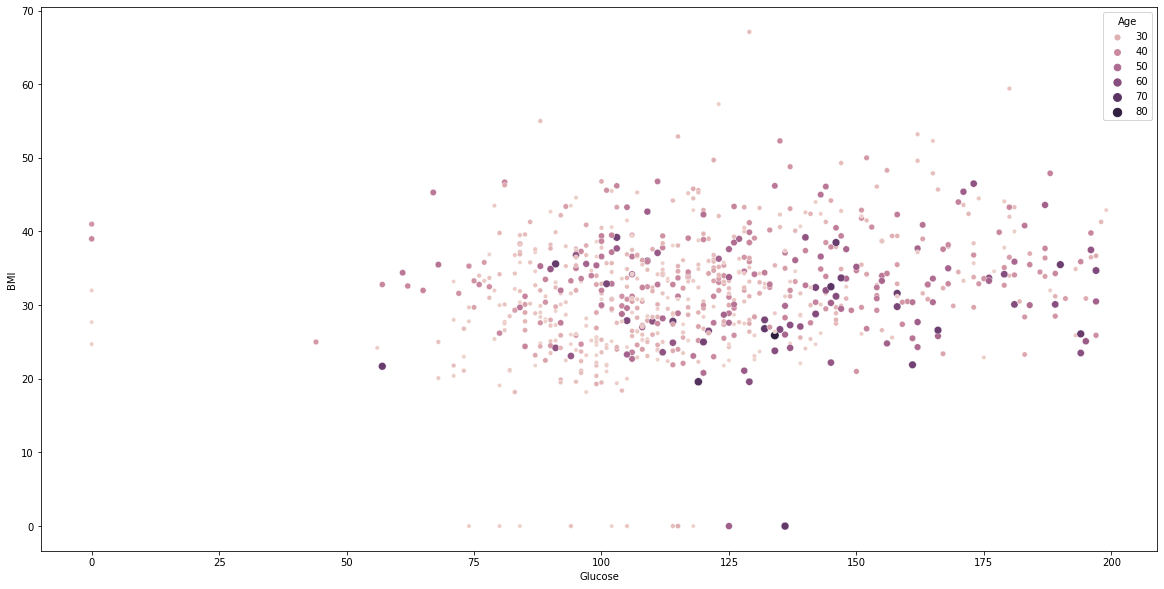

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Age", size="Age")

Text(0.5, 6.79999999999999, 'Outcome')

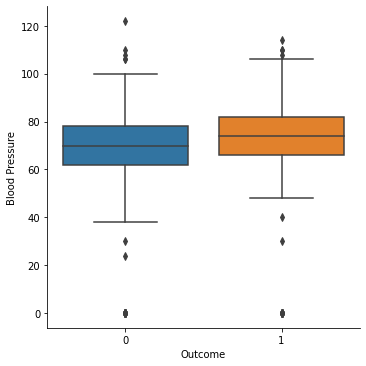

In [21]:
sns.catplot(y="BloodPressure",x="Outcome",data=df,kind="box")
plt.ylabel("Blood Pressure")
plt.xlabel("Outcome")

Text(0.5, 6.79999999999999, 'Outcome')

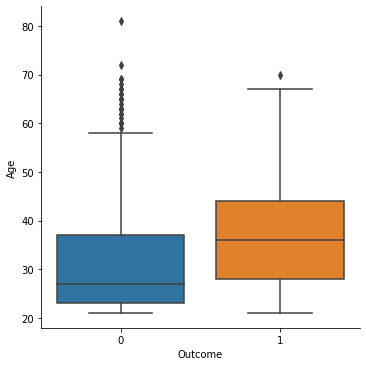

In [22]:
sns.catplot(y="Age",x="Outcome",data=df,kind="box")
plt.ylabel("Age")
plt.xlabel("Outcome")

Text(0.5, 6.79999999999999, 'Outcome')

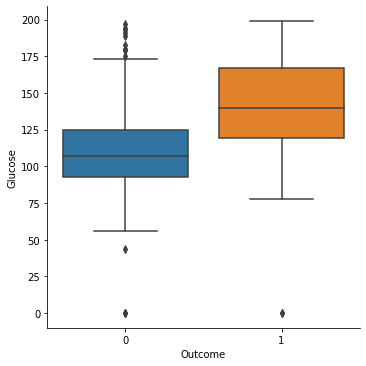

In [23]:
sns.catplot(y="Glucose",x="Outcome",data=df,kind="box")
plt.ylabel("Glucose")
plt.xlabel("Outcome")

Text(0.5, 6.79999999999999, 'Outcome')

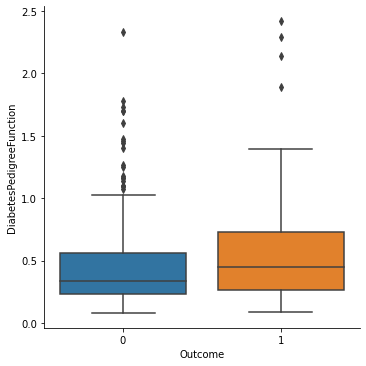

In [24]:
sns.catplot(y="DiabetesPedigreeFunction",x="Outcome",data=df,kind="box")
plt.ylabel("DiabetesPedigreeFunction")
plt.xlabel("Outcome")

In [25]:
df = df[(df.SkinThickness < 70) & (df.Glucose > 0) & (df.BloodPressure > 35) & (df.BMI > 0)]
df.Outcome.value_counts()

0    473
1    247
Name: Outcome, dtype: int64

In [36]:
# Construct train & test data
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
lg_accuracy = round(accuracy_score(y_pred, y_test), 2)*100
lg_accuracy

80.0

In [40]:
classifier = RandomForestClassifier(n_estimators=6, criterion='entropy', random_state=0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
rf_accuracy = round(accuracy_score(y_pred, Y_test), 2)*100
rf_accuracy

73.0

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
knn_accuracy = round(accuracy_score(y_pred, Y_test), 2)*100
knn_accuracy

72.0

### ROC AUC

/Users/appleowner/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/appleowner/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/appleowner/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plo

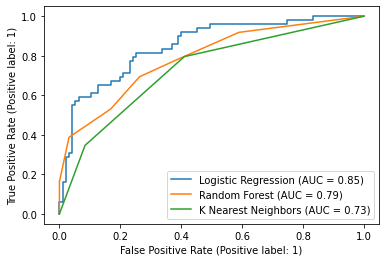

In [48]:
fig = plot_roc_curve(logreg, X_test, y_test, name="Logistic Regression")
fig = plot_roc_curve(classifier, X_test, y_test, name="Random Forest", ax=fig.ax_)
fig = plot_roc_curve(knn, X_test, y_test, name="K Nearest Neighbors", ax=fig.ax_)


This plot shows us True positive rate on y-axis vs False positive rate. 
Also it illustrates the predictive power of the classification models.
Based on the graph Logistic regression performs better than the other two models

### Precision recall

/Users/appleowner/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/appleowner/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/appleowner/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recal

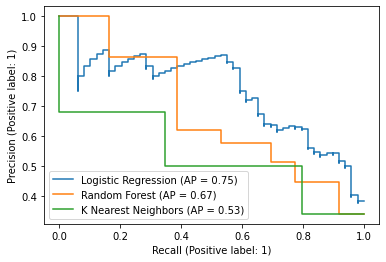

In [49]:
fig = plot_precision_recall_curve(logreg, X_test, y_test, name="Logistic Regression")
fig = plot_precision_recall_curve(classifier, X_test, y_test, name="Random Forest", ax=fig.ax_)
fig = plot_precision_recall_curve(knn, X_test, y_test, name="K Nearest Neighbors", ax=fig.ax_)

Precision recall shows the tradeoff between the precision and recall. 
Based on the graph logistic regression also performs the best. 

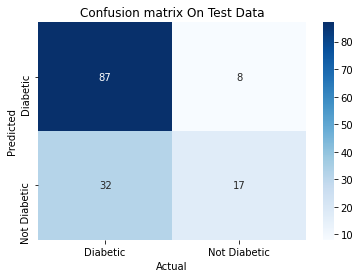

In [54]:
cm = confusion_matrix(Y_test, y_pred)
new_cm = pd.DataFrame(cm , index = ['Diabetic','Not Diabetic'] , columns = ['Diabetic','Not Diabetic'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Diabetic','Not Diabetic'], yticklabels = ['Diabetic','Not Diabetic'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

Confusion matrix enables us to compare the actual and predicted values between the diabetic and non deiabetic category on test data. 